In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns

In [14]:
nursery_data = pd.read_csv('nursery_data.csv', names=["parents","has_nurs","form","children","housing","finance","social","health","class"])
print(nursery_data.isnull())
nursery_data

       parents  has_nurs   form  children  housing  finance  social  health  \
0        False     False  False     False    False    False   False   False   
1        False     False  False     False    False    False   False   False   
2        False     False  False     False    False    False   False   False   
3        False     False  False     False    False    False   False   False   
4        False     False  False     False    False    False   False   False   
...        ...       ...    ...       ...      ...      ...     ...     ...   
12955    False     False  False     False    False    False   False   False   
12956    False     False  False     False    False    False   False   False   
12957    False     False  False     False    False    False   False   False   
12958    False     False  False     False    False    False   False   False   
12959    False     False  False     False    False    False   False   False   

       class  
0      False  
1      False  
2     

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [15]:
#Categorical
features = ["parents","has_nurs","form","children","housing","finance","social","health","class"]
for column in features:
    nursery_data[column] = nursery_data[column].astype("category").cat.codes
nursery_data

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [16]:
target = ["class"]
X=nursery_data.drop(target,axis=1)
X=np.array(X)
Y=pd.DataFrame(nursery_data[target])
Y=np.array(Y)
X,Y

(array([[2, 3, 0, ..., 0, 0, 2],
        [2, 3, 0, ..., 0, 0, 1],
        [2, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 4, 2, ..., 1, 1, 2],
        [0, 4, 2, ..., 1, 1, 1],
        [0, 4, 2, ..., 1, 1, 0]], dtype=int8),
 array([[2],
        [1],
        [0],
        ...,
        [3],
        [3],
        [0]], dtype=int8))

In [17]:
model = tf.keras.Sequential([
    keras.layers.Dense(25, input_shape=(8,), activation=tf.nn.tanh),
    keras.layers.Dense(13, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.30)
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(0.001),
             metrics=['accuracy'])
xtest.shape,ytest.shape,xtrain.shape,ytrain.shape

((3888, 8), (3888, 1), (9072, 8), (9072, 1))

In [18]:
history = model.fit(xtrain, ytrain, epochs=1000, validation_split=0.10,verbose=2)

Train on 8164 samples, validate on 908 samples
Epoch 1/1000
 - 2s - loss: 1.0922 - acc: 0.5622 - val_loss: 0.7606 - val_acc: 0.7632
Epoch 2/1000
 - 1s - loss: 0.5843 - acc: 0.7951 - val_loss: 0.4856 - val_acc: 0.8161
Epoch 3/1000
 - 1s - loss: 0.4345 - acc: 0.8350 - val_loss: 0.3933 - val_acc: 0.8392
Epoch 4/1000
 - 1s - loss: 0.3684 - acc: 0.8583 - val_loss: 0.3426 - val_acc: 0.8502
Epoch 5/1000
 - 1s - loss: 0.3323 - acc: 0.8702 - val_loss: 0.3166 - val_acc: 0.8568
Epoch 6/1000
 - 1s - loss: 0.3084 - acc: 0.8797 - val_loss: 0.2992 - val_acc: 0.8645
Epoch 7/1000
 - 1s - loss: 0.2901 - acc: 0.8840 - val_loss: 0.2777 - val_acc: 0.8778
Epoch 8/1000
 - 1s - loss: 0.2736 - acc: 0.8914 - val_loss: 0.2638 - val_acc: 0.8877
Epoch 9/1000
 - 1s - loss: 0.2611 - acc: 0.8948 - val_loss: 0.2515 - val_acc: 0.8888
Epoch 10/1000
 - 1s - loss: 0.2500 - acc: 0.8996 - val_loss: 0.2435 - val_acc: 0.8954
Epoch 11/1000
 - 1s - loss: 0.2397 - acc: 0.9030 - val_loss: 0.2327 - val_acc: 0.9009
Epoch 12/1000
 -

Epoch 96/1000
 - 1s - loss: 0.0462 - acc: 0.9808 - val_loss: 0.0594 - val_acc: 0.9747
Epoch 97/1000
 - 1s - loss: 0.0466 - acc: 0.9799 - val_loss: 0.0571 - val_acc: 0.9769
Epoch 98/1000
 - 1s - loss: 0.0515 - acc: 0.9786 - val_loss: 0.0552 - val_acc: 0.9780
Epoch 99/1000
 - 1s - loss: 0.0461 - acc: 0.9804 - val_loss: 0.0568 - val_acc: 0.9703
Epoch 100/1000
 - 1s - loss: 0.0433 - acc: 0.9813 - val_loss: 0.0555 - val_acc: 0.9758
Epoch 101/1000
 - 1s - loss: 0.0436 - acc: 0.9821 - val_loss: 0.0616 - val_acc: 0.9747
Epoch 102/1000
 - 1s - loss: 0.0445 - acc: 0.9820 - val_loss: 0.0646 - val_acc: 0.9692
Epoch 103/1000
 - 1s - loss: 0.0454 - acc: 0.9821 - val_loss: 0.0733 - val_acc: 0.9670
Epoch 104/1000
 - 1s - loss: 0.0492 - acc: 0.9772 - val_loss: 0.0578 - val_acc: 0.9769
Epoch 105/1000
 - 1s - loss: 0.0434 - acc: 0.9820 - val_loss: 0.0565 - val_acc: 0.9780
Epoch 106/1000
 - 1s - loss: 0.0455 - acc: 0.9794 - val_loss: 0.0602 - val_acc: 0.9758
Epoch 107/1000
 - 1s - loss: 0.0446 - acc: 0.98

Epoch 191/1000
 - 1s - loss: 0.0336 - acc: 0.9843 - val_loss: 0.0496 - val_acc: 0.9824
Epoch 192/1000
 - 1s - loss: 0.0333 - acc: 0.9857 - val_loss: 0.0456 - val_acc: 0.9824
Epoch 193/1000
 - 1s - loss: 0.0352 - acc: 0.9849 - val_loss: 0.0525 - val_acc: 0.9802
Epoch 194/1000
 - 1s - loss: 0.0327 - acc: 0.9851 - val_loss: 0.0505 - val_acc: 0.9791
Epoch 195/1000
 - 1s - loss: 0.0331 - acc: 0.9844 - val_loss: 0.0502 - val_acc: 0.9758
Epoch 196/1000
 - 1s - loss: 0.0377 - acc: 0.9824 - val_loss: 0.0511 - val_acc: 0.9780
Epoch 197/1000
 - 1s - loss: 0.0367 - acc: 0.9846 - val_loss: 0.0539 - val_acc: 0.9780
Epoch 198/1000
 - 1s - loss: 0.0331 - acc: 0.9847 - val_loss: 0.0569 - val_acc: 0.9747
Epoch 199/1000
 - 1s - loss: 0.0329 - acc: 0.9858 - val_loss: 0.0498 - val_acc: 0.9791
Epoch 200/1000
 - 1s - loss: 0.0323 - acc: 0.9847 - val_loss: 0.0559 - val_acc: 0.9747
Epoch 201/1000
 - 1s - loss: 0.0335 - acc: 0.9837 - val_loss: 0.0608 - val_acc: 0.9758
Epoch 202/1000
 - 1s - loss: 0.0341 - acc: 

 - 1s - loss: 0.0276 - acc: 0.9875 - val_loss: 0.0488 - val_acc: 0.9769
Epoch 286/1000
 - 1s - loss: 0.0267 - acc: 0.9885 - val_loss: 0.0495 - val_acc: 0.9780
Epoch 287/1000
 - 1s - loss: 0.0254 - acc: 0.9880 - val_loss: 0.0475 - val_acc: 0.9802
Epoch 288/1000
 - 1s - loss: 0.0267 - acc: 0.9887 - val_loss: 0.0418 - val_acc: 0.9813
Epoch 289/1000
 - 1s - loss: 0.0271 - acc: 0.9875 - val_loss: 0.0444 - val_acc: 0.9813
Epoch 290/1000
 - 1s - loss: 0.0238 - acc: 0.9913 - val_loss: 0.0414 - val_acc: 0.9824
Epoch 291/1000
 - 1s - loss: 0.0255 - acc: 0.9892 - val_loss: 0.0540 - val_acc: 0.9769
Epoch 292/1000
 - 1s - loss: 0.0242 - acc: 0.9892 - val_loss: 0.0448 - val_acc: 0.9813
Epoch 293/1000
 - 1s - loss: 0.0250 - acc: 0.9904 - val_loss: 0.0454 - val_acc: 0.9791
Epoch 294/1000
 - 1s - loss: 0.0234 - acc: 0.9906 - val_loss: 0.0490 - val_acc: 0.9791
Epoch 295/1000
 - 1s - loss: 0.0248 - acc: 0.9897 - val_loss: 0.0469 - val_acc: 0.9824
Epoch 296/1000
 - 1s - loss: 0.0233 - acc: 0.9897 - val_lo

Epoch 380/1000
 - 1s - loss: 0.0089 - acc: 0.9979 - val_loss: 0.0157 - val_acc: 0.9934
Epoch 381/1000
 - 1s - loss: 0.0060 - acc: 0.9994 - val_loss: 0.0146 - val_acc: 0.9956
Epoch 382/1000
 - 1s - loss: 0.0054 - acc: 0.9995 - val_loss: 0.0148 - val_acc: 0.9934
Epoch 383/1000
 - 1s - loss: 0.0086 - acc: 0.9977 - val_loss: 0.0152 - val_acc: 0.9934
Epoch 384/1000
 - 1s - loss: 0.0106 - acc: 0.9967 - val_loss: 0.0131 - val_acc: 0.9945
Epoch 385/1000
 - 1s - loss: 0.0058 - acc: 0.9993 - val_loss: 0.0115 - val_acc: 0.9956
Epoch 386/1000
 - 1s - loss: 0.0062 - acc: 0.9994 - val_loss: 0.0135 - val_acc: 0.9945
Epoch 387/1000
 - 1s - loss: 0.0142 - acc: 0.9955 - val_loss: 0.0148 - val_acc: 0.9945
Epoch 388/1000
 - 1s - loss: 0.0055 - acc: 0.9996 - val_loss: 0.0131 - val_acc: 0.9956
Epoch 389/1000
 - 1s - loss: 0.0056 - acc: 0.9990 - val_loss: 0.0149 - val_acc: 0.9934
Epoch 390/1000
 - 1s - loss: 0.0050 - acc: 0.9994 - val_loss: 0.0136 - val_acc: 0.9945
Epoch 391/1000
 - 1s - loss: 0.0055 - acc: 

Epoch 474/1000
 - 1s - loss: 8.2098e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9989
Epoch 475/1000
 - 1s - loss: 8.5598e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 476/1000
 - 1s - loss: 8.7609e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9967
Epoch 477/1000
 - 1s - loss: 0.0016 - acc: 0.9999 - val_loss: 0.0052 - val_acc: 0.9978
Epoch 478/1000
 - 1s - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0196 - val_acc: 0.9901
Epoch 479/1000
 - 1s - loss: 0.0048 - acc: 0.9984 - val_loss: 0.0077 - val_acc: 0.9967
Epoch 480/1000
 - 1s - loss: 0.0060 - acc: 0.9977 - val_loss: 0.0049 - val_acc: 0.9978
Epoch 481/1000
 - 1s - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0058 - val_acc: 0.9978
Epoch 482/1000
 - 1s - loss: 8.0369e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 483/1000
 - 1s - loss: 7.1060e-04 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 484/1000
 - 1s - loss: 7.8685e-04 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9989
Epoch 485/1000
 - 1

Epoch 565/1000
 - 1s - loss: 3.3227e-04 - acc: 1.0000 - val_loss: 8.4483e-04 - val_acc: 1.0000
Epoch 566/1000
 - 1s - loss: 3.0304e-04 - acc: 1.0000 - val_loss: 9.2123e-04 - val_acc: 1.0000
Epoch 567/1000
 - 1s - loss: 3.1342e-04 - acc: 1.0000 - val_loss: 8.9193e-04 - val_acc: 1.0000
Epoch 568/1000
 - 1s - loss: 2.8754e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 569/1000
 - 1s - loss: 3.0320e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 570/1000
 - 1s - loss: 2.9098e-04 - acc: 1.0000 - val_loss: 9.1871e-04 - val_acc: 1.0000
Epoch 571/1000
 - 1s - loss: 2.7859e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 572/1000
 - 1s - loss: 3.5067e-04 - acc: 1.0000 - val_loss: 9.0841e-04 - val_acc: 1.0000
Epoch 573/1000
 - 1s - loss: 2.7736e-04 - acc: 1.0000 - val_loss: 9.9568e-04 - val_acc: 1.0000
Epoch 574/1000
 - 1s - loss: 3.2806e-04 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 575/1000
 - 1s - loss: 4.7343e-04 - acc: 0.9999 - val_loss: 

Epoch 655/1000
 - 1s - loss: 2.0877e-04 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 0.9989
Epoch 656/1000
 - 1s - loss: 1.9592e-04 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 0.9989
Epoch 657/1000
 - 1s - loss: 1.8297e-04 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 0.9989
Epoch 658/1000
 - 1s - loss: 1.8200e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 0.9989
Epoch 659/1000
 - 1s - loss: 1.6798e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 0.9989
Epoch 660/1000
 - 1s - loss: 1.6603e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 0.9989
Epoch 661/1000
 - 1s - loss: 1.5673e-04 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 662/1000
 - 1s - loss: 1.5479e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 663/1000
 - 1s - loss: 1.4915e-04 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 664/1000
 - 1s - loss: 1.9325e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 665/1000
 - 1s - loss: 1.5594e-04 - acc: 1.0000 - val_loss: 8.2036e-04 - val_acc: 1.

Epoch 744/1000
 - 1s - loss: 1.1267e-04 - acc: 1.0000 - val_loss: 8.9311e-04 - val_acc: 1.0000
Epoch 745/1000
 - 1s - loss: 1.0517e-04 - acc: 1.0000 - val_loss: 8.6545e-04 - val_acc: 1.0000
Epoch 746/1000
 - 1s - loss: 1.0509e-04 - acc: 1.0000 - val_loss: 6.2553e-04 - val_acc: 1.0000
Epoch 747/1000
 - 1s - loss: 9.6834e-05 - acc: 1.0000 - val_loss: 6.7497e-04 - val_acc: 1.0000
Epoch 748/1000
 - 1s - loss: 9.9977e-05 - acc: 1.0000 - val_loss: 6.2876e-04 - val_acc: 1.0000
Epoch 749/1000
 - 1s - loss: 8.9850e-05 - acc: 1.0000 - val_loss: 6.2275e-04 - val_acc: 1.0000
Epoch 750/1000
 - 1s - loss: 8.4256e-05 - acc: 1.0000 - val_loss: 6.8048e-04 - val_acc: 1.0000
Epoch 751/1000
 - 1s - loss: 8.4582e-05 - acc: 1.0000 - val_loss: 5.8628e-04 - val_acc: 1.0000
Epoch 752/1000
 - 1s - loss: 7.8078e-05 - acc: 1.0000 - val_loss: 5.7202e-04 - val_acc: 1.0000
Epoch 753/1000
 - 1s - loss: 8.1675e-05 - acc: 1.0000 - val_loss: 4.5280e-04 - val_acc: 1.0000
Epoch 754/1000
 - 1s - loss: 7.7075e-05 - acc: 1.0

Epoch 831/1000
 - 1s - loss: 0.0164 - acc: 0.9957 - val_loss: 0.0017 - val_acc: 0.9989
Epoch 832/1000
 - 1s - loss: 2.2625e-04 - acc: 1.0000 - val_loss: 2.5949e-04 - val_acc: 1.0000
Epoch 833/1000
 - 1s - loss: 1.4204e-04 - acc: 1.0000 - val_loss: 2.6145e-04 - val_acc: 1.0000
Epoch 834/1000
 - 1s - loss: 1.0321e-04 - acc: 1.0000 - val_loss: 2.3938e-04 - val_acc: 1.0000
Epoch 835/1000
 - 1s - loss: 8.7648e-05 - acc: 1.0000 - val_loss: 2.1795e-04 - val_acc: 1.0000
Epoch 836/1000
 - 1s - loss: 7.9444e-05 - acc: 1.0000 - val_loss: 2.2410e-04 - val_acc: 1.0000
Epoch 837/1000
 - 1s - loss: 7.2062e-05 - acc: 1.0000 - val_loss: 2.1893e-04 - val_acc: 1.0000
Epoch 838/1000
 - 1s - loss: 6.7922e-05 - acc: 1.0000 - val_loss: 2.0407e-04 - val_acc: 1.0000
Epoch 839/1000
 - 1s - loss: 6.3440e-05 - acc: 1.0000 - val_loss: 2.0235e-04 - val_acc: 1.0000
Epoch 840/1000
 - 1s - loss: 5.8963e-05 - acc: 1.0000 - val_loss: 1.9346e-04 - val_acc: 1.0000
Epoch 841/1000
 - 1s - loss: 5.6615e-05 - acc: 1.0000 - va

Epoch 918/1000
 - 1s - loss: 6.4314e-05 - acc: 1.0000 - val_loss: 9.4518e-04 - val_acc: 0.9989
Epoch 919/1000
 - 1s - loss: 5.8243e-05 - acc: 1.0000 - val_loss: 8.7237e-04 - val_acc: 1.0000
Epoch 920/1000
 - 1s - loss: 5.3042e-05 - acc: 1.0000 - val_loss: 8.3044e-04 - val_acc: 1.0000
Epoch 921/1000
 - 1s - loss: 4.9160e-05 - acc: 1.0000 - val_loss: 6.8702e-04 - val_acc: 1.0000
Epoch 922/1000
 - 1s - loss: 4.5791e-05 - acc: 1.0000 - val_loss: 4.9393e-04 - val_acc: 1.0000
Epoch 923/1000
 - 1s - loss: 4.2926e-05 - acc: 1.0000 - val_loss: 4.9512e-04 - val_acc: 1.0000
Epoch 924/1000
 - 1s - loss: 3.9959e-05 - acc: 1.0000 - val_loss: 5.4569e-04 - val_acc: 1.0000
Epoch 925/1000
 - 1s - loss: 3.9189e-05 - acc: 1.0000 - val_loss: 4.1238e-04 - val_acc: 1.0000
Epoch 926/1000
 - 1s - loss: 3.6817e-05 - acc: 1.0000 - val_loss: 3.8627e-04 - val_acc: 1.0000
Epoch 927/1000
 - 1s - loss: 3.4790e-05 - acc: 1.0000 - val_loss: 3.0145e-04 - val_acc: 1.0000
Epoch 928/1000
 - 1s - loss: 3.3606e-05 - acc: 1.0

3888/3888 [==============================] - 0s 37us/sample - loss: 0.0015 - acc: 0.9997
99.97428059577942


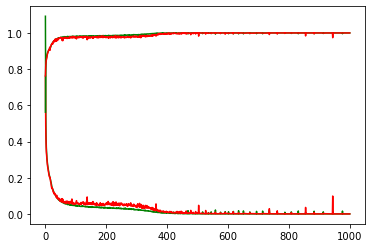

In [19]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')
plt.plot(history.epoch, history.history['acc'],'g')
plt.plot(history.epoch, history.history['val_acc'],'r')
loss, accuracy = model.evaluate(xtest,ytest)
print(accuracy*100)